In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation

In [3]:
# Importeren van veel gebruikte libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
import datetime
import cv2

# Importeren libaries voor aanpassen/behandelen features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importeren DL libaries
import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input, Conv2D, MaxPooling2D, Flatten, concatenate, Rescaling, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from pathlib import Path
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [4]:
inputPath = "C:/Users/ganda/Downloads/Deeplearning1"
inputPathtrain = 'C:/Users/ganda/Downloads/Deeplearning1/Train'

In [5]:
import cv2

In [6]:
example = cv2.imread(inputPath + "/Train/1.jpg")
example

array([[[100, 126, 156],
        [110, 137, 164],
        [127, 154, 181],
        ...,
        [ 54,  42,  62],
        [ 49,  38,  58],
        [ 43,  32,  52]],

       [[114, 140, 170],
        [120, 147, 174],
        [120, 147, 173],
        ...,
        [ 48,  37,  57],
        [ 44,  33,  53],
        [ 40,  31,  51]],

       [[118, 147, 174],
        [128, 157, 184],
        [117, 148, 171],
        ...,
        [ 41,  32,  53],
        [ 38,  29,  50],
        [ 38,  31,  52]],

       ...,

       [[199, 192, 195],
        [203, 197, 202],
        [199, 199, 205],
        ...,
        [196, 163, 144],
        [131,  86,  65],
        [101,  53,  29]],

       [[199, 194, 196],
        [200, 197, 199],
        [197, 200, 204],
        ...,
        [181, 145, 127],
        [124,  81,  64],
        [136,  93,  74]],

       [[201, 196, 198],
        [197, 196, 198],
        [194, 197, 201],
        ...,
        [159, 123, 105],
        [127,  86,  71],
        [181, 138, 123]]

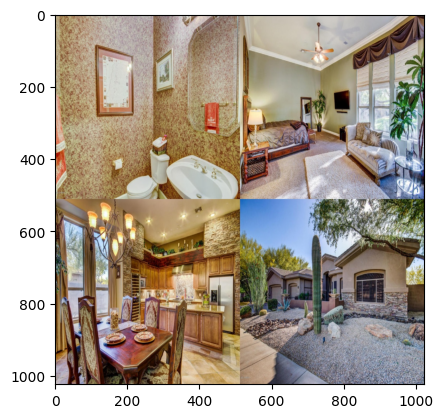

In [7]:
import matplotlib.pyplot as plt
plt.imshow(example[...,::-1])

In [8]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split


train_df = pd.read_csv(os.path.join(inputPath, "train.csv"))
test_df = pd.read_csv(os.path.join(inputPath, "test.csv"))


print(train_df.head())
print(test_df.head())


   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude   Price
0         1         4        4.0  4053   33.6968  -111.8892  869500
1         2         4        3.0  3343   34.8280  -119.0349  865200
2         3         3        4.0  3923   33.7669  -111.9182  889000
3         4         5        5.0  4022   33.7752  -111.7791  910000
4         5         3        4.0  4116   33.7669  -111.9182  971226
   House ID  Bedrooms  Bathrooms  Area  Latitude  Longitude
0       501         3        2.0  2330   35.6406  -120.7003
1       502         3        2.5  1339   35.6406  -120.7003
2       503         3        2.0  1472   35.6406  -120.7003
3       504         4        4.0  2681   35.6406  -120.7003
4       505         3        2.5  1935   33.8085  -117.9228


In [9]:
num_train_images = len(os.listdir(os.path.join(inputPath, "Train")))
num_test_images = len(os.listdir(os.path.join(inputPath, "Test")))

train_filenames = [str(i) + ".jpg" for i in range(1, num_train_images + 1)]
test_filenames = [str(i) + ".jpg" for i in range(1, num_test_images + 1)]

train_labels = train_df["House ID"]
test_labels = test_df["House ID"]

train_files = [os.path.join(inputPath, "Train", filename) for filename in train_filenames]
test_files = [os.path.join(inputPath, "Test", filename) for filename in test_filenames]


print(train_files)
print(test_files)

['C:/Users/ganda/Downloads/Deeplearning1\\Train\\1.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\2.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\3.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\4.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\5.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\6.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\7.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\8.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\9.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\10.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\11.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\12.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\13.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\14.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\15.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\16.jpg', 'C:/Users/ganda/Downloads/Deeplearning1\\Train\\17.jpg', 'C:/Users/ganda/Downloads/Deeplearning1

In [10]:
import cv2
import os

def read_images_from_directory(directory_path, prefix, start_index, num_images):
    images = []
    for i in range(start_index, start_index + num_images):
        image_path = os.path.join(directory_path, f"{prefix}{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")
    return images

train_directory = os.path.join(inputPath, "Train")
train_prefix = ""
num_train_images = 500

test_directory = os.path.join(inputPath, "Test")
test_prefix = ""
test_start_index = 501  # Start index for "Test" images
num_test_images = 35

train_images = read_images_from_directory(train_directory, train_prefix, 1, num_train_images)
print(f"Number of training images read: {len(train_images)}")

test_images = read_images_from_directory(test_directory, test_prefix, test_start_index, num_test_images)
print(f"Number of testing images read: {len(test_images)}")


Number of training images read: 500
Number of testing images read: 35


In [11]:
import cv2
import os

def read_images_from_directory(directory_path, prefix, num_images):
    images = []
    for i in range(1, num_images + 1):
        image_path = os.path.join(directory_path, f"{prefix}{i}.jpg")
        if os.path.exists(image_path):
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
            else:
                print(f"Failed to read image: {image_path}")
        else:
            print(f"Image not found: {image_path}")
    return images

train_directory = os.path.join(inputPath, "Train")
prefix = ""
num_images = 500

train_images = read_images_from_directory(train_directory, prefix, num_images)

for i in range(5):
    print(train_images[i])


[[[100 126 156]
  [110 137 164]
  [127 154 181]
  ...
  [ 54  42  62]
  [ 49  38  58]
  [ 43  32  52]]

 [[114 140 170]
  [120 147 174]
  [120 147 173]
  ...
  [ 48  37  57]
  [ 44  33  53]
  [ 40  31  51]]

 [[118 147 174]
  [128 157 184]
  [117 148 171]
  ...
  [ 41  32  53]
  [ 38  29  50]
  [ 38  31  52]]

 ...

 [[199 192 195]
  [203 197 202]
  [199 199 205]
  ...
  [196 163 144]
  [131  86  65]
  [101  53  29]]

 [[199 194 196]
  [200 197 199]
  [197 200 204]
  ...
  [181 145 127]
  [124  81  64]
  [136  93  74]]

 [[201 196 198]
  [197 196 198]
  [194 197 201]
  ...
  [159 123 105]
  [127  86  71]
  [181 138 123]]]
[[[175 203 227]
  [175 203 227]
  [176 202 226]
  ...
  [192 182 194]
  [201 184 195]
  [200 180 192]]

 [[177 205 229]
  [176 204 228]
  [178 204 228]
  ...
  [191 181 193]
  [195 179 190]
  [193 176 187]]

 [[179 207 231]
  [178 206 230]
  [180 206 230]
  ...
  [192 182 194]
  [191 177 188]
  [190 174 185]]

 ...

 [[196 226 243]
  [197 230 245]
  [200 233 248]
  ..

Number of images in the dataset: 500
Average image size: [1024. 1024.]
Average number of color channels: 3.0


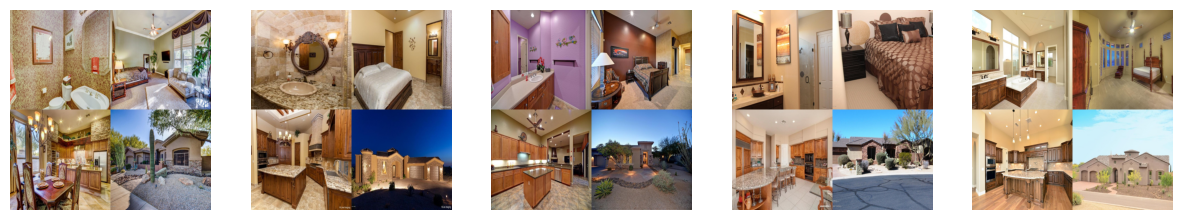

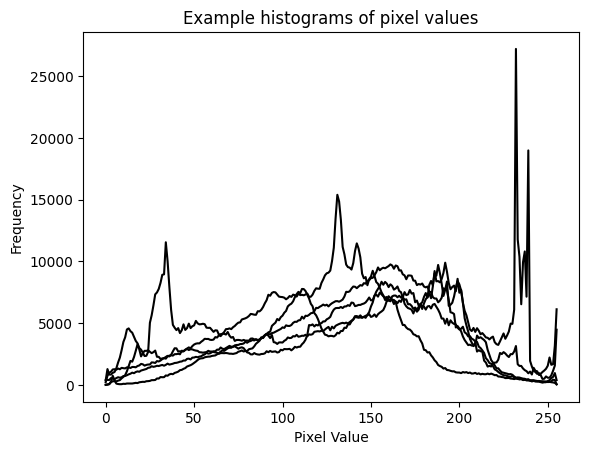

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def display_images(images, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i in range(num_samples):
        axes[i].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        axes[i].axis('off')
    plt.show()

def display_histograms(images, num_samples=5):
    for i, image in enumerate(images[:num_samples]):
        histogram = cv2.calcHist([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
        plt.plot(histogram, color='black')
    plt.title('Example histograms of pixel values')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

num_images = len(train_images)
print("Number of images in the dataset:", num_images)

image_sizes = np.array([image.shape[:2] for image in train_images])
print("Average image size:", np.mean(image_sizes, axis=0))

num_channels = np.array([image.shape[2] if len(image.shape) == 3 else 1 for image in train_images])
print("Average number of color channels:", np.mean(num_channels))


display_images(train_images)
display_histograms(train_images)


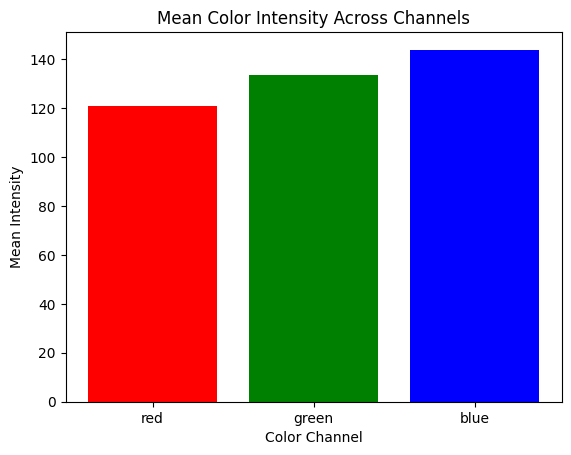

In [13]:
import os

def get_class_labels(directory):
    return [d for d in os.listdir(directory) if os.path.isdir(os.path.join(directory, d))]

def plot_mean_color_intensity(images):
    mean_intensity = np.mean(images, axis=(0, 1, 2))
    colors = ['red', 'green', 'blue']
    plt.bar(colors, mean_intensity, color=colors)
    plt.title('Mean Color Intensity Across Channels')
    plt.xlabel('Color Channel')
    plt.ylabel('Mean Intensity')
    plt.show()

class_labels = get_class_labels('C:/Users/ganda/Downloads/Deeplearning1/Train')

plot_mean_color_intensity(train_images)


In [14]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
#batch_size = len(train_images)
# Dit is het antwoord, maar de applicatie crasht door te weinig ram.
batch_size = 50
img_height, img_width, _ = train_images[0].shape

print(batch_size)
print(img_height)
print(img_width)


50
1024
1024


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Split the list of image arrays into training and validation sets
train_images, val_images = train_test_split(train_images, test_size=0.2, random_state=123)

# Display the number of images in the training and validation sets
print("Number of images in training set:", len(train_images))
print("Number of images in validation set:", len(val_images))
from pathlib import Path

Number of images in training set: 400
Number of images in validation set: 100


SOURCES:


Deep Learning Specialization on Coursera by Andrew Ng.
Deep Learning Book by Ian Goodfellow, Yoshua Bengio, and Aaron Courville.
Keras Documentation for details on building neural networks using Keras

Convolutioneel neuraal netwerk (CNN)

Luca o




Hier maak ik gebruik van **tf.keras.utils.image_dataset_from_directory** function om trainings- en validatiedatasets te maken voor een Convolutioneel Neuraal Netwerk (CNN).

In [17]:
img_train = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/ganda/Downloads/Deeplearning1/Train',
  validation_split=0.2,
  subset="training",
  seed=45,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files.
Using 400 files for training.


Hier maak je een trainingsdataset (img_train). Laten we de parameters eens bekijken:

**'/content/drive/MyDrive/Projects/Deeplearning1/Train':** Dit is het pad naar de map waar je trainingsafbeeldingen zich bevinden. De functie zal deze map doorzoeken en de afbeeldingen laden.

**validation_split=0.2**: Dit betekent dat 20% van de gegevens zal worden gebruikt als validatieset. Met andere woorden, 80% van de gegevens worden gebruikt voor training en 20% voor validatie.

**subset="training"**: Hier geef je aan dat dit deel van de dataset moet worden gebruikt als de trainingssubset.

**seed=45**: Dit is de willekeurige zaadwaarde voor het splitsen van de gegevens. Het zorgt ervoor dat als je het script opnieuw uitvoert, je dezelfde splitsing krijgt.

**label_mode=None**: Dit betekent dat de labels niet worden geladen, wat betekent dat je waarschijnlijk ongelabelde gegevens hebt of dat de mapstructuur van de gegevens de klassen aangeeft.

**image_size=(img_height, img_width)**: Hier stel je de grootte in van de afbeeldingen die zullen worden gebruikt voor training.

**batch_size=batch_size**: Dit is de grootte van de batches afbeeldingen die worden gebruikt tijdens training.


In [18]:
img_val = tf.keras.utils.image_dataset_from_directory(
  'C:/Users/ganda/Downloads/Deeplearning1/Train',
  validation_split=0.2,
  subset="validation",
  seed=45,
  label_mode=None,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 500 files.
Using 100 files for validation.


Hier maak je een validatiedataset (img_val). De parameters zijn grotendeels hetzelfde als die voor de trainingsdataset, behalve:

subset="validation": Dit geeft aan dat dit deel van de dataset moet worden gebruikt als de validatiesubset.
Dus wat er gebeurt is dat je je trainings- en validatiedatasets opzet vanaf de gegeven map. De trainingsdataset bevat 80% van de afbeeldingen voor het trainen van je CNN-model, terwijl de validatiedataset 20% van de afbeeldingen bevat die worden gebruikt om de prestaties van het model te valideren tijdens het trainen (om overpassing te voorkomen).

In [19]:
image_file_paths = img_train.file_paths

# Extract only file ID without extension from file paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train_df.loc[train_df['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_train = tf.data.Dataset.zip((img_train, labels_dataset))

# OOK VOOR VALIDATIE SET
image_file_paths = img_val.file_paths

# Extract only file ID without extension from file paths
image_hids = [Path(image_file_path).stem for image_file_path in image_file_paths]
image_hids_int = [int(house_id) for house_id in image_hids]

labels = [train_df.loc[train_df['House ID'] == houseid, 'Price'].values for houseid in image_hids_int]

# Convert the list of labels into a TensorFlow dataset
labels_dataset = tf.data.Dataset.from_tensor_slices(labels).batch(batch_size)

# Combine the original image dataset with the labels dataset
final_val = tf.data.Dataset.zip((img_val, labels_dataset))



In deze cel converteren we de foto's in ons dataset naar een Tensor dataset, en daar voegen we een label bij toe uit de data van 'House ID'. Dit hebben wij geleerd tijdens de lessen van Deep Learning (Beeldclassificatie met CNNs - Flowers deel 1) & (Flowers deel 2 - Hyperparameter tuning)

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

img_train = final_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
img_val = final_val.cache().prefetch(buffer_size=AUTOTUNE)


.cache(): Dit zorgt ervoor dat de dataset in het geheugen of op schijf wordt gecachet. Dit kan de trainingspipeline versnellen, vooral bij herhaalde iteraties over de dataset.

.shuffle(1000): Dit mengt de gegevens met een buffer van grootte 1000. Dit helpt bij het introduceren van willekeur in de trainingsdata, wat belangrijk is voor een goede training.

.prefetch(buffer_size=AUTOTUNE): Dit laadt gegevens voor de volgende batch terwijl de huidige batch wordt verwerkt, waardoor de trainingssnelheid kan toenemen.

Hier worden de afbeeldingen in de trainings- en validatiedatasets opnieuw geschaald naar een gewenste grootte van 256x256 pixels. Dit is vaak een standaardpreprocessingstap om alle afbeeldingen in een uniforme grootte te hebben.

In [21]:
img_height = 256  # Define your desired image size
img_width = 256
train_horse = img_train.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))
val_horse = img_val.map(lambda x, y: (tf.image.resize(x, (img_height, img_width)), y))

In [22]:
input_shape= (256, 256, 3)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)


Modelleren


Na de image pipeline te hebben gebruikt, kunnen we eindelijk beginnen met het modelleren. Hier laten wij zien hoe we het model hebben opgezet, en zullen we onze keuzes uitleggen.


**Onderbouw je keuzes van het aantal convolutionele lagen, poollagen, convolutionele
kernels per laag, het aantal fully-connected lagen en het aantal neuronen per laag**


**Convolutionele Lagen (Conv2D):
We hebben drie convolutionele lagen gebruikt. Dit aantal is typisch voor een CNN-architectuur voor beeldclassificatie. Het helpt bij het extraheren van verschillende niveaus van kenmerken uit de invoerbeelden.
Elke Conv2D-laag heeft 126 kernels. Dit is een keuze op basis van het experiment en kan variëren op basis van de complexiteit van de dataset. Een hoger aantal kernels kan helpen bij het leren van meer complexe patronen en functies in de gegevens. Wij hebben geexperimenteerd met veschillende kernels, en 126 gaf ons de laagste loss.



**Poollagen (MaxPooling2D):
Na elke convolutionele laag hebben we een MaxPooling2D-laag toegevoegd. Deze lagen verminderen de dimensionaliteit van de gegevens door de ruimtelijke afmetingen te verkleinen. Dit helpt om overfitting te voorkomen en computationele efficiëntie te verbeteren.

**Batch Normalization (BatchNormalization):
Batch Normalization-lagen zijn opgenomen na elke Conv2D-laag om de trainingsstabiliteit en de snelheid van het trainen te verbeteren. Ze helpen bij het normaliseren van de activaties van een vorige laag, waardoor het gemakkelijker wordt voor de volgende laag om te leren.

**Aantal Neuronen in de Volledig Verbonden Lagen (Dense):
We hebben twee volledig verbonden (Dense) lagen gebruikt na het flattenen van de gegevens.
De eerste Dense-laag heeft 100 neuronen. Dit aantal neuronen is een keuze op basis van de complexiteit van de gegevens en kan worden aangepast afhankelijk van het gewenste modelcomplexiteit.

In [23]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(126, activation='relu', kernel_size=3, input_shape=(256,256,3)),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(126, activation='relu', kernel_size=3),
    keras.layers.MaxPooling2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)
])

c:\Users\ganda\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:
opt= keras.optimizers.Adam(learning_rate=0.0001)

cnn_model.compile(optimizer=opt,
              loss='mape')
cnn_history = cnn_model.fit(train_horse, epochs=20, validation_data=val_horse, callbacks=[stop_early])




Epoch 1/20


8/8 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - loss: 99.9929 - val_loss: 100.0075
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 49s 6s/step - loss: 99.9523 - val_loss: 99.9763
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - loss: 99.8888 - val_loss: 99.9038
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - loss: 99.8075 - val_loss: 99.8226
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - loss: 99.7336 - val_loss: 99.7513
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - loss: 99.6110 - val_loss: 99.6819
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - loss: 99.5307 - val_loss: 99.6113
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - loss: 99.3682 - val_loss: 99.5297
Epoch 9/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 46s 6s/step - loss: 99.3060 - val_loss: 99.4427
Epoch 10/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 6s/step - loss: 99.0747 - val_loss: 99.3199
Epoch 11/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 45s 6s/step - loss: 99.0347 - val_loss: 99.2167
Epoch 12/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 44s 5s/step - loss: 98.8808 - val_loss: 99.1242

**Compile je model met je gekozen lossfunctie en optimizer, en train deze op de
afbeeldingen.**

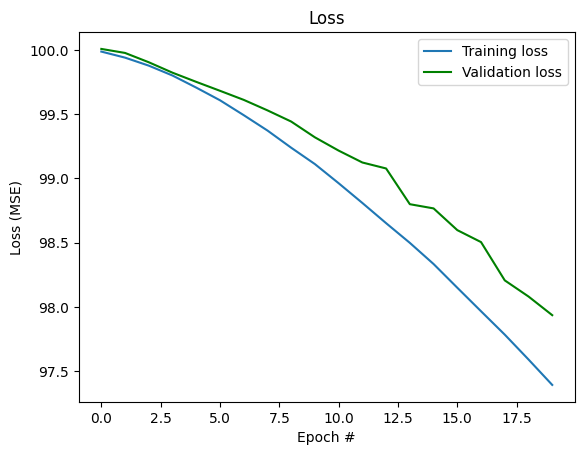

In [25]:
plt.plot(cnn_history.history['loss'], label='Training loss')
plt.plot(cnn_history.history['val_loss'], 'g', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss (MSE)')
plt.title('Loss')
plt.legend()
plt.show()

Plot je modelarchitectuur met behulp van een geschikte visualisatietool.

In [46]:
tf.keras.utils.plot_model(cnn_model, to_file='jessemidghet.png', show_shapes=True, show_layer_names=True)
#??????????????????????????????????????????????????????????????????????????????????????
# Hoort te werken

AttributeError: module 'pydot' has no attribute 'InvocationException'

**Gebruik een of meer van de volgende technieken in je model. Beschrijf en motiveer
je keuze:
o L1 regularisatie
o L2 regularisatie
o Dropout
o Batchnorm**

Dropout: (Science & Science, 2024),  (Brownlee, 2019)
Dropout is een techniek waarbij willekeurig geselecteerde eenheden in een laag worden uitgeschakeld tijdens het trainen. Dit betekent dat deze eenheden niet bijdragen aan het voorwaarts- of achterwaarts doorgeven van gegevens. Het helpt om co-adaptatie van neuronen te voorkomen en maakt het netwerk robuuster.
Dropout is effectief gebleken bij het voorkomen van overfitting, vooral in diepere netwerken. Het dwingt het netwerk om meer robuuste kenmerken te leren en vermindert de afhankelijkheid van specifieke neuronen.

Batch Normalization: (Team, z.d.)
Batch Normalization is een techniek waarbij de invoer van elke laag wordt genormaliseerd, meestal vóór de activatiefunctie. Dit helpt om de trainingsstabiliteit te verbeteren, de leercurve te versnellen en het risico op overfitting te verminderen.
Batch Normalization is handig in diepere netwerken waar interne covariance shift kan optreden. Het helpt het netwerk om sneller te convergeren tijdens het trainen en kan de algehele prestaties van het model verbeteren.


Volgens *Dropout vs. batch normalization: an empirical study of their impact to deep learning* van Christian Garbin1 · Xingquan Zhu1 · Oge Marques zijn er verschillende redenen tussen dropout en batch normalization. Ze zeggen bijvoorbeeld het volgende:

- Add batch normalization before attempting other changes: combined with increasing the learning rate (see next item), adding batch normalization improved accuracy by a
significant value without a significant increase of training time (tests 10, 11 and 12 in
Table 5). Because it is simple to add batch normalization, it is recommended to add it
as a baseline for further improvements in the network performance, before attempting
more costly hyperparameter changes.

Dit is de reden dat we als eerst batch normalization toevoegen aan ons model. Ook staat in de paper van Garbin, Zhu en Marques (2020) het volgende:

- Dropout rate and layer placement: try several dropout rates and dropout layer placement. While the tests in this paper resulted in lower accuracy (Table 5 – tests 6 to 9,
using only dropout, and tests 13 to 15, where dropout cancels out the batch normalization accuracy gains), [17] showed improved accuracy when dropout is used, but only
for specific dropout rates and in specific places in the network. The specific rates that
result in better accuracy vary by network configuration. Trial-and-error is still the best
method to find a good dropout rate and layer placement.

Dit is de reden dat we verschillende dropout rates hebben geprobeerd voor een beter resultaat op het model. 

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import regularizers

# Definieer de CNN-architectuur met Batch Normalization en Dropout
cnn_model = keras.Sequential([
    Conv2D(126, activation='relu', kernel_size=3, input_shape=(256,256,3)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),  # Dropout met 25% kans om een neuron uit te schakelen
    Conv2D(126, activation='relu', kernel_size=3),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),
    Conv2D(126, activation='relu', kernel_size=3),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.25),
    Flatten(),
    Dense(100, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularisatie met gewicht 0.01
    Dropout(0.5),
    Dense(1)
])

# Compileer het model
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mape'])

# Bekijk de samenvatting van het model
cnn_model.summary()


c:\Users\ganda\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 126)  │         3,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 126)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 127, 127, 126)  │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 127, 126)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 126)  │       143,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 62, 62, 126)    │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 62, 62, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 126)    │       143,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 30, 30, 126)    │           504 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 30, 30, 126)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 113400)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │    11,340,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,631,261 (44.37 MB)

 Trainable params: 11,630,505 (44.37 MB)

 Non-trainable params: 756 (2.95 KB)

Beschrijf welke vormen van data augmentation (indien van toepassing ) geschikt zijn
voor dit probleem. Implementeer dit in je datapijplijn.


1. Horizontale en Verticale Flips:
Het spiegelen van afbeeldingen langs de horizontale en verticale as. Dit kan handig zijn als het niet uitmaakt of een object op zijn kop staat voor classificatie. Bij onze dataset, de House price dataset maken wij hier geen gebruik van.
2. Rotaties:
Het roteren van afbeeldingen met verschillende hoeken. Hierdoor kan het model patronen leren herkennen ongeacht de oriëntatie van het object. Dit zou handig kunnen zijn voor ons probleem met de huisprijzen, het model kan handige patronen zien, bijvoorbeeld een huis met een garage in de hoek is meer waard (?)

3. Breedte- en Hoogteschuiving:
Het verschuiven van de afbeelding in de breedte en hoogte. Hierdoor kan het model leren om objecten te herkennen, zelfs als ze niet perfect gecentreerd zijn.

4. Zoomen:
Het willekeurig inzoomen op delen van de afbeeldingen. Dit helpt het model om te leren om objecten te herkennen, zelfs als ze op verschillende schalen in de afbeelding voorkomen. Dit zou erg handig kunnen zijn voor ons probleem. Het model zou belangrijke delen van de afbeeldingen kunnen highlighten, bijvoorbeeld een mooie keuken, mooie auto's op de stoep of een diamant in de midden van de kamer. Dan weet je dat je huis duur is.

### Bronnenlijst

Brownlee, J. (2019, 6 augustus). A Gentle Introduction to Dropout for Regularizing Deep Neural Networks. MachineLearningMastery.com. https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/ 

Garbin, C., Zhu, X., & Marques, O. (2020). Dropout vs. batch normalization: an empirical study of their impact to deep learning. Multimedia Tools And Applications, 79(19–20), 12777–12815. https://doi.org/10.1007/s11042-019-08453-9 Science, 

B. O. C., & Science, B. O. C. (2024, 18 maart). How ReLU and Dropout Layers Work in CNNs | Baeldung on Computer Science. Baeldung On Computer Science. https://www.baeldung.com/cs/ml-relu-dropout-layers 

Team, K. (z.d.). Keras documentation: BatchNormalization layer. https://keras.io/api/layers/normalization_layers/batch_normalization/